In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_state: str

In [2]:
def first_node(state):
    print("My first node is called")
    return {"graph_state": state["graph_state"] + "I am playing"}

def second_node(state):
    print("My second node is called")
    return {"graph_state": state["graph_state"] + "Cricket"}

def third_node(state):
    print("My second node is called")
    return {"graph_state": state["graph_state"] + "Badminton"}



In [3]:
import random
from typing import Literal
def decide_play(state)->Literal["second_node", "third_node"]:
    graph_state = state["graph_state"]
    if random.random() < 0.5:
        return ["second_node"]
    else:
        return ["third_node"]  

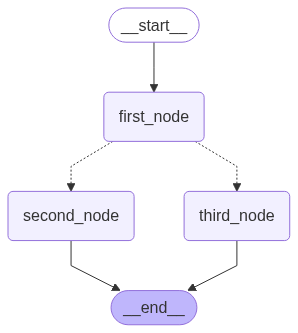

In [4]:
## graph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END

builder  = StateGraph(State)

builder.add_node("first_node", first_node)
builder.add_node("second_node", second_node)
builder.add_node("third_node", third_node)

builder.add_edge(START, "first_node")
builder.add_conditional_edges("first_node", decide_play)
builder.add_edge("second_node", END)
builder.add_edge("third_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
graph.invoke({"graph_state":"Hi, my name is Aman"})


My first node is called
My second node is called


{'graph_state': 'Hi, my name is AmanI am playingCricket'}

### Chatbot

In [6]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [7]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [8]:
graph_builder=StateGraph(State)

In [9]:
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [10]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000016604AED400>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000016604AEE4E0>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [11]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [12]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

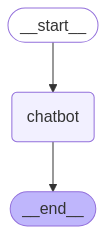

In [13]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [15]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hi! 👋

What can I do for you today? 😊

Assistant: The India-Pakistan wars are a complex and tragic part of the history of both nations. There have been four major wars and numerous smaller conflicts between them since their partition in 1947.  

Here's a brief overview of the major wars:

**1. First Kashmir War (1947-1948):**

* **Cause:** Following India's independence, princely states were given the choice to join India or Pakistan. Jammu and Kashmir, a predominantly Muslim state, was ruled by a Hindu Maharaja who initially favored accession to India. However, tribal raiders backed by Pakistan invaded the state, leading to war.
* **Outcome:** A UN-mandated ceasefire line was established, dividing Kashmir between India and Pakistan. The issue of Kashmir's final status remains unresolved to this day.

**2. Second Kashmir War (1965):**

* **Cause:** Pakistan launched a surprise attack on Indian positions in Kashmir, aiming to capture more territory.
* **Outcome:** The war end